# e-Commerce Customer Service Satisfaction Project

*The project structure follows the DMAIC (Define, Measure, Analyze, Improve, Control) throughout.*

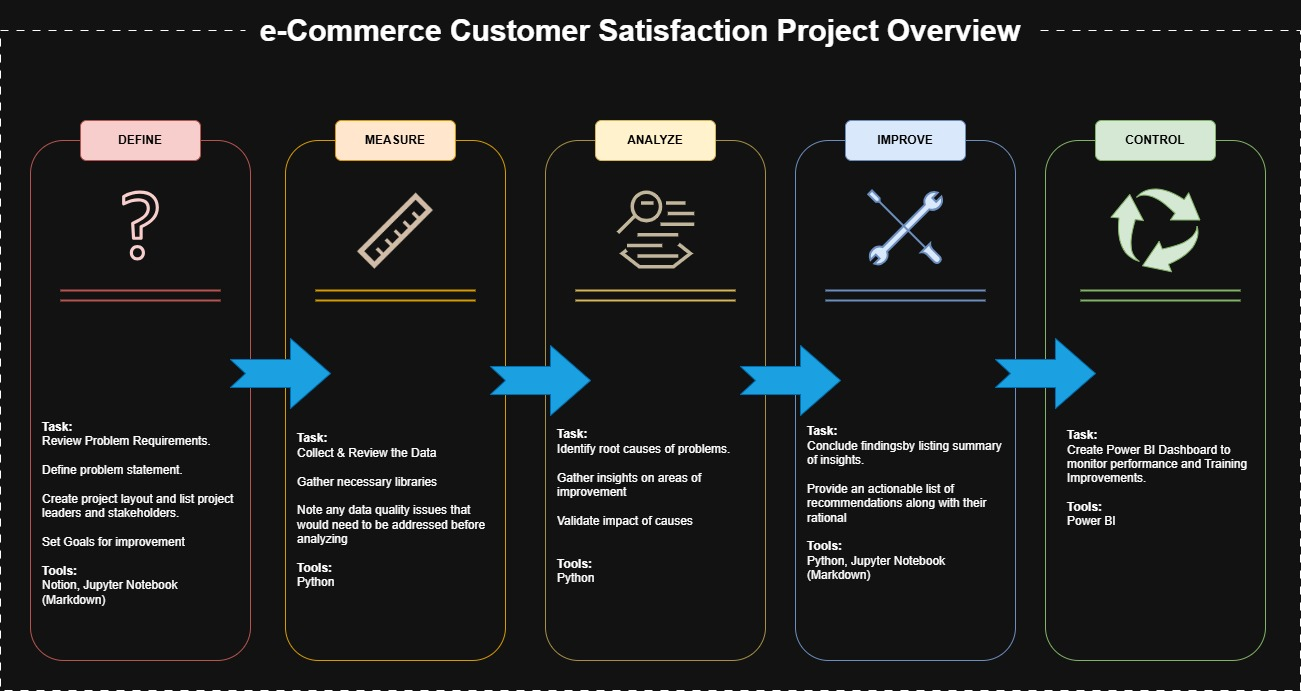


---

## Project Scenario & Requirements:

**Shopzilla** leadership believes that improving customer satisfaction will lead to more repeat buyers, directly impacting long-term growth. Recently however, they noticed a drop in their CSAT performance in the month of August, falling below their usual targert of 85% and need data driven insights to identify the key friction points in the customer journey and recommend the right strategies for improvement. 

They’ve brought in a Data Analyst (You) to investigate the factors affecting CSAT, uncover actionable insights, and build a dashboard to track improvement efforts over time.

----

# Define

---

### Business Problem:

**Current CSAT:** ~83%, Target CSAT: 85%

**Goal**: Increase CSAT to 85% or more to drive repeat buyers and boost revenue.<br /><br />
Stakeholders:<br />
- **Emma Reynolds:** Head of Customer Experience<br />
- **David Chen:** Operations Manager<br />
- **Sophia Martinez:** Product Manager<br />
- **Rachel Adams:** Customer Support Lead<br />
- **Mark Patel:** Head of Data Analytics<br />
- **Kevin Folkes:** Data Analyst

### Tasks: 

- Review and understand the data. (Clean and Standardize if necessary)
- Investigate the root cause of low CSAT across different channels and product categories.
- Pinpoint pain points in the customer journey if there’s any to reveal (e.g., products defects, shipping delays, slow response).
- Understand the impact of customer service on overall satisfaction and identify gaps in support processes.


- Deliver a clear analysis of customer metrics.
- Provide actionable recommendation for improving key areas.
- Suggest short term and long-term strategies to improve satisfaction, focusing on the most pressing concerns.


 - Develop a dashboard to track the progress of CSAT improvement and the effectiveness of recommended solutions.

---

 <br><br>

# Measure

In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import warnings

In [2]:
# settings & variables

pd.set_option('display.max_columns', None)
file = 'Customer_support_data.csv'

# remove warnings
warnings.filterwarnings('ignore')

### Reviewing the Data

In [4]:
# Read in the data as a data frame.
e_commerce_df = pd.read_csv(file)

# Review the first 10 rows of the data frame.
e_commerce_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [8]:
# Review column info
e_commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [10]:
# Check columns for null entires: 
e_commerce_df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [12]:
# Checking how many unique values there are  per column:

e_commerce_df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

In [14]:
# Get the value counts for each column in the list

# Create list with desired columns: 
columns = ['category', 'Product_category','Customer_City', ]

# Loop through each column and print the value count. 
for column in columns: 
    x =  e_commerce_df[column].value_counts()
    print(f'-------------------{column}--------------------')
    print(f'-------------------{e_commerce_df[column].count()}-------------------')
    print(x)

-------------------category--------------------
-------------------85907-------------------
category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64
-------------------Product_category--------------------
-------------------17196-------------------
Product_category
Electronics                    4706
LifeStyle                      4118
Books & General merchandise    3323
Mobile                         1758
Home                           1328
Home Appliences                1300
Furniture                       471
Affiliates                      166
GiftCard                         26
Name: count, dtype: int64
-------------------Customer_City--------------------
-----------------

In [16]:
print(e_commerce_df['Survey_response_Date'].min(), '\n', e_commerce_df['Survey_response_Date'].max())

01-Aug-23 
 31-Aug-23


**Conclusion:**

- There are 85907 unique records.
- Customer Remarks, Order_id, order_date_time, Customer_City, Product_category, Item_price and connected_handling_time largely contains missing or null data.
- Column names are not standardized.
- Data contains info for 1 month, from 2023-08-01 - 2023-08-31 (YYYY-MM-DD).
- Date columns are not formatted to date objects.
                    

---

# Analyze

---

### Standardize & Enrich Data

In [23]:
# copy df 
e_commerce_standard_df = e_commerce_df.copy()

# Standardize column names.

# place all column names in lower case
col_name_list = e_commerce_standard_df.columns.str.lower()

# replace all spaces and hyphens with underscores in the column names
e_commerce_standard_df.columns = col_name_list.str.replace(r'[ /-]', '_', regex=True)

In [25]:
# format date columns to the be recognized at dates in pandas: 

# Create list with date columns
date_columns = ['order_date_time', 'issue_reported_at', 'issue_responded', 'survey_response_date']

# Loop through each column and format them to a date object: 
for date_col in date_columns: 

    # survey_response_date is the only date column without time,
    # therefore, if the columns in the list is not equal to 'survey_response_date', formate to date and time, else just date.
    if date_col != 'survey_response_date':
        e_commerce_standard_df[date_col] = pd.to_datetime(e_commerce_standard_df[date_col], dayfirst=True)
    else:
        # Else, formate to date only
        e_commerce_standard_df[date_col] = pd.to_datetime(e_commerce_standard_df[date_col]).dt.date

In [27]:
# derive additional columns from CSAT column

# create the CSAT column with satisfaction description
e_commerce_standard_df['csat'] = e_commerce_standard_df['csat_score'].apply(lambda x: 
                                                          'Very Satisfied' if x == 5 else
                                                          'Somewhat Satisfied' if x == 4 else 
                                                          'Neutral' if x == 3 else
                                                          'Somewhat Dissatisfied' if x == 2 else 
                                                          'Very Dissatisfied' if x == 1 else
                                                          'Unknown')

# create  the CSAT percentage columns: 

e_commerce_standard_df['csat_percent'] = e_commerce_standard_df['csat_score'].apply(lambda x: 
                                                          1 * 100 if x == 5 else
                                                          1 * 100 if x == 4 else 
                                                          0 * 100 if x == 3 else
                                                          0 * 100 if x == 2 else 
                                                          0 * 100 if x == 1 else
                                                          np.nan(x))


# create response time columns
e_commerce_standard_df['response_time'] = (e_commerce_standard_df['issue_responded'] - e_commerce_standard_df['issue_reported_at']).dt.total_seconds()/60

# create week column: 
e_commerce_standard_df['week_number'] = e_commerce_standard_df['issue_reported_at'].dt.isocalendar().week

# Review top 10: 
e_commerce_standard_df.head()

,unique_id,channel_name,category,sub_category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score,csat,csat_percent,response_time,week_number
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaT,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,Very Satisfied,100,34.0,31
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaT,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,Very Satisfied,100,2.0,31
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaT,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,Very Satisfied,100,22.0,31
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaT,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,Very Satisfied,100,20.0,31
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaT,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,Very Satisfied,100,2.0,31


<br /><br />

### Investigate Root Cause & Data Insights:

**How is the weekly CSAT performance per channel**?

In [32]:
# group the channels by week number and get the CSAT avg: 
csat_channel_grouped = pd.pivot_table(e_commerce_standard_df, index=['week_number'], values='csat_percent',columns=['channel_name'], aggfunc='mean')

# Assign week_num as a column: 
csat_channel_grouped.reset_index(inplace=True)

# melt df so CSAT performance (csat_percent) is in its own column
weekly_CSAT = csat_channel_grouped.melt(id_vars='week_number', 
                                  var_name='channel_name', 
                                  value_name='csat_percent')

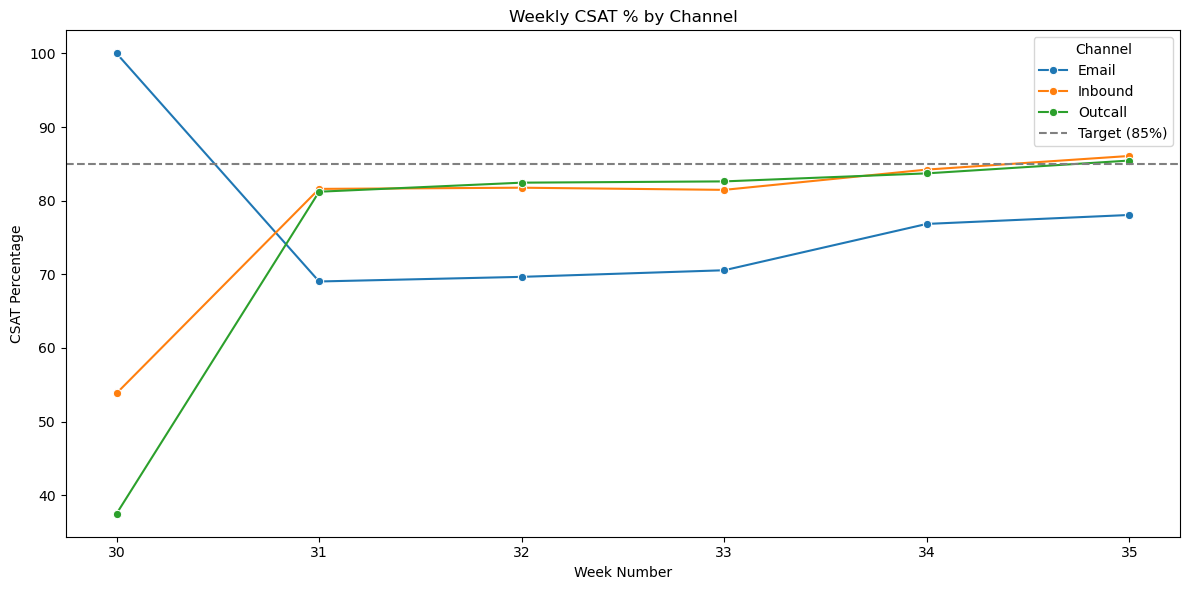

In [34]:
# plot df as a line chart: 

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_CSAT, x='week_number', y='csat_percent', hue='channel_name', marker='o')
# add target line
CSAT_target = 85
plt.axhline(y=CSAT_target, color='grey', linestyle='--', linewidth=1.5, label=f"Target ({CSAT_target}%)")

# add title and labels
plt.title('Weekly CSAT % by Channel')
plt.xlabel('Week Number')
plt.ylabel('CSAT Percentage')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

- CSAT is below target for most available weeks for all lines of buisness.
- Inbound and Outcall channels hit the target in week 35.

---

<br>

**Which channel is struggling with CSAT the most?**

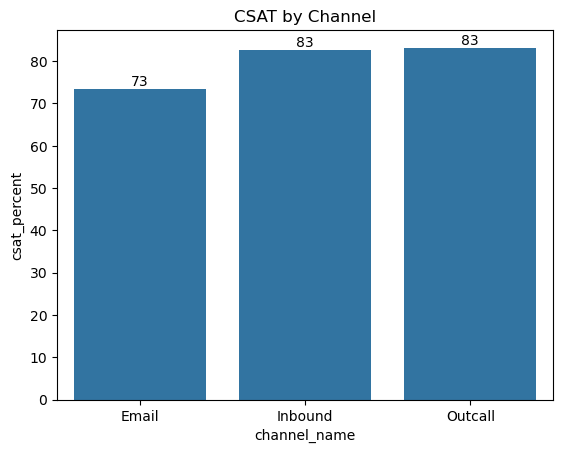

In [40]:
# Which channel is struggling with CSAT the most: 

# group & sort df by channel
group_by_channel = e_commerce_standard_df.groupby('channel_name')['csat_percent'].mean().reset_index()
group_by_channel.sort_values(by='channel_name', ascending=True, inplace=True)

#plot results

ax = sns.barplot(data=group_by_channel, x='channel_name', y='csat_percent')

# plot labels 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# show title and chart
plt.title('CSAT by Channel')
plt.show()

- The email channel is the struggling the most out of the 3 
- Inbound and Outcall are both at 83% CSAT

---

**Which are the top impacting categories?**

In [45]:
# filter out top-boxes CSAT (very and somewhat satisfied)
dsat = e_commerce_standard_df[e_commerce_standard_df['csat_percent'] == 0]

# group by category.
dsat_group_by_category = dsat.groupby('category', as_index=False)['csat_percent'].count()

# sort the values in descending order.
dsat_group_by_category.sort_values(by='csat_percent', ascending=False, inplace=True)

# create the cumulative column
dsat_group_by_category['cumulative'] = dsat_group_by_category['csat_percent'].cumsum()/ dsat_group_by_category['csat_percent'].sum() * 100
dsat_group_by_category.reset_index(drop=True, inplace=True)

In [47]:
dsat_group_by_category

,category,csat_percent,cumulative
0,Returns,6507,43.175635
1,Order Related,4978,76.205958
2,Product Queries,853,81.865835
3,Refund Related,804,87.200584
4,Cancellation,533,90.737177
5,Feedback,462,93.802667
6,Shopzilla Related,447,96.768628
7,Payments related,342,99.037887
8,Offers & Cashback,82,99.581979
9,Others,40,99.847389


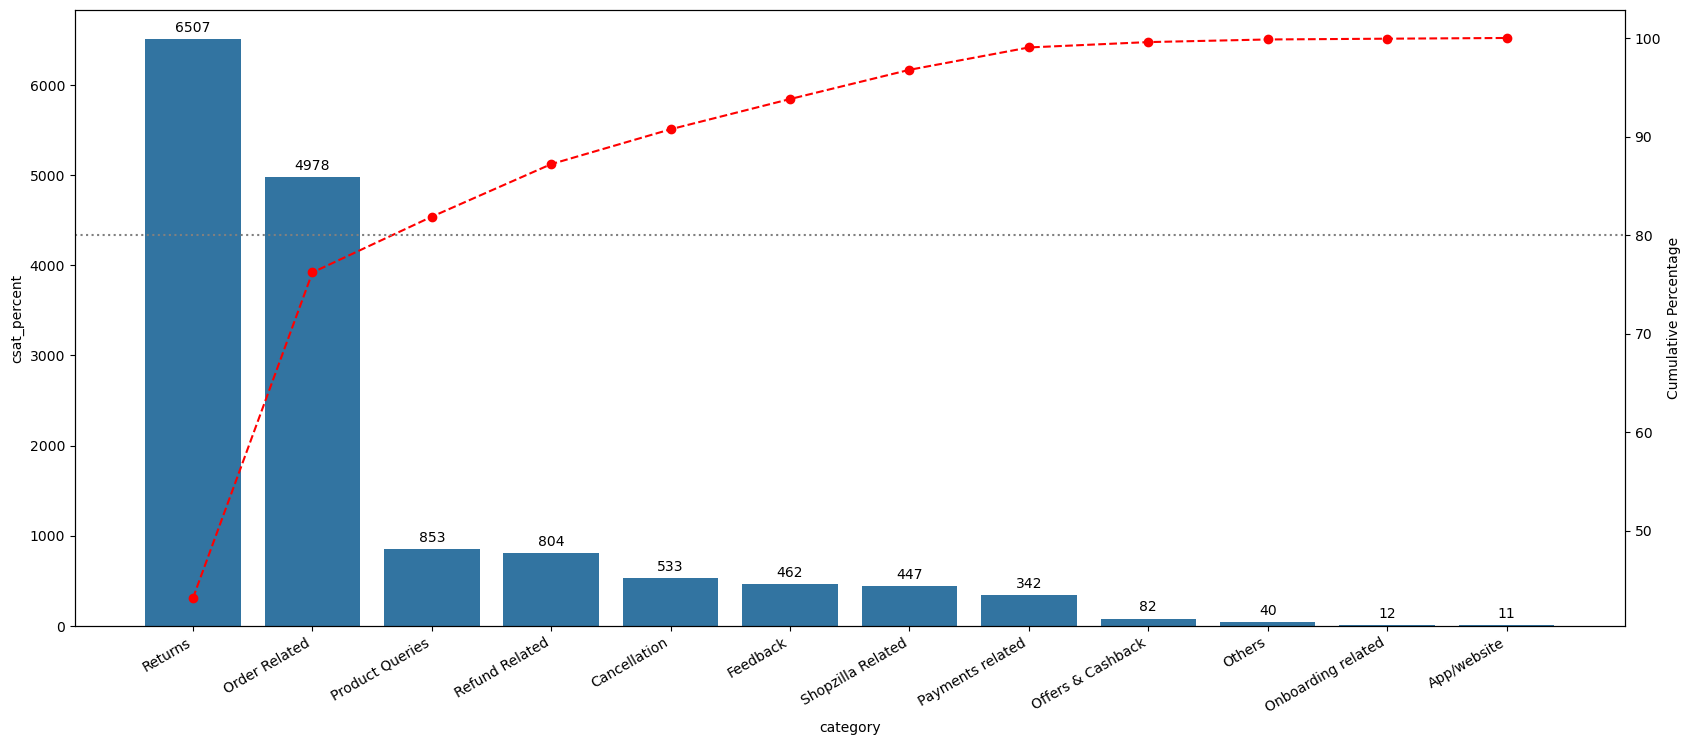

In [49]:
# plot pareto 
fig, ax1 = plt.subplots(figsize=(20, 8))
sns.barplot(data=dsat_group_by_category, x='category', y='csat_percent')
ax1.bar_label(ax1.containers[0], fmt='%d', padding=3)
ax1.set_xticklabels(dsat_group_by_category['category'], rotation=30, ha='right')

# secondary axis, plot frequency line
ax2 = ax1.twinx()
ax2.plot(dsat_group_by_category['category'], dsat_group_by_category['cumulative'], color='red', marker='o', linestyle='dashed', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')

# Add Threshold Line (80% Pareto Principle)
ax2.axhline(y=80, color='gray', linestyle='dotted')

plt.show()

- Product categories (Returns, order Related and Product Queries) are responsible for > 80% of DSAT's (dissatisfied CSAT's).
- Returns and Order Related account for over 70% of DSAT's whereas Product queries only accounts for 5-6% 

---

**What are the top impacting sub categories?**

In [54]:
# What are the top impacting sub categories? 

dsat_group_by_sub_category = dsat.groupby(['category','sub_category'], as_index=False)['csat_percent'].count()

# sort the values in descending order.
dsat_group_by_sub_category.sort_values(by='csat_percent', ascending=False, inplace=True)

# create the cumulative column
dsat_group_by_sub_category['cumulative'] = dsat_group_by_sub_category['csat_percent'].cumsum()/ dsat_group_by_sub_category['csat_percent'].sum() * 100
dsat_group_by_sub_category.reset_index(drop=True, inplace=True)

In [56]:
dsat_group_by_sub_category.head()

,category,sub_category,csat_percent,cumulative
0,Returns,Reverse Pickup Enquiry,4250,28.199854
1,Order Related,Delayed,1719,39.605866
2,Order Related,Order status enquiry,1281,48.105633
3,Order Related,Installation/demo,1139,55.663194
4,Product Queries,Product Specific Information,822,61.117378


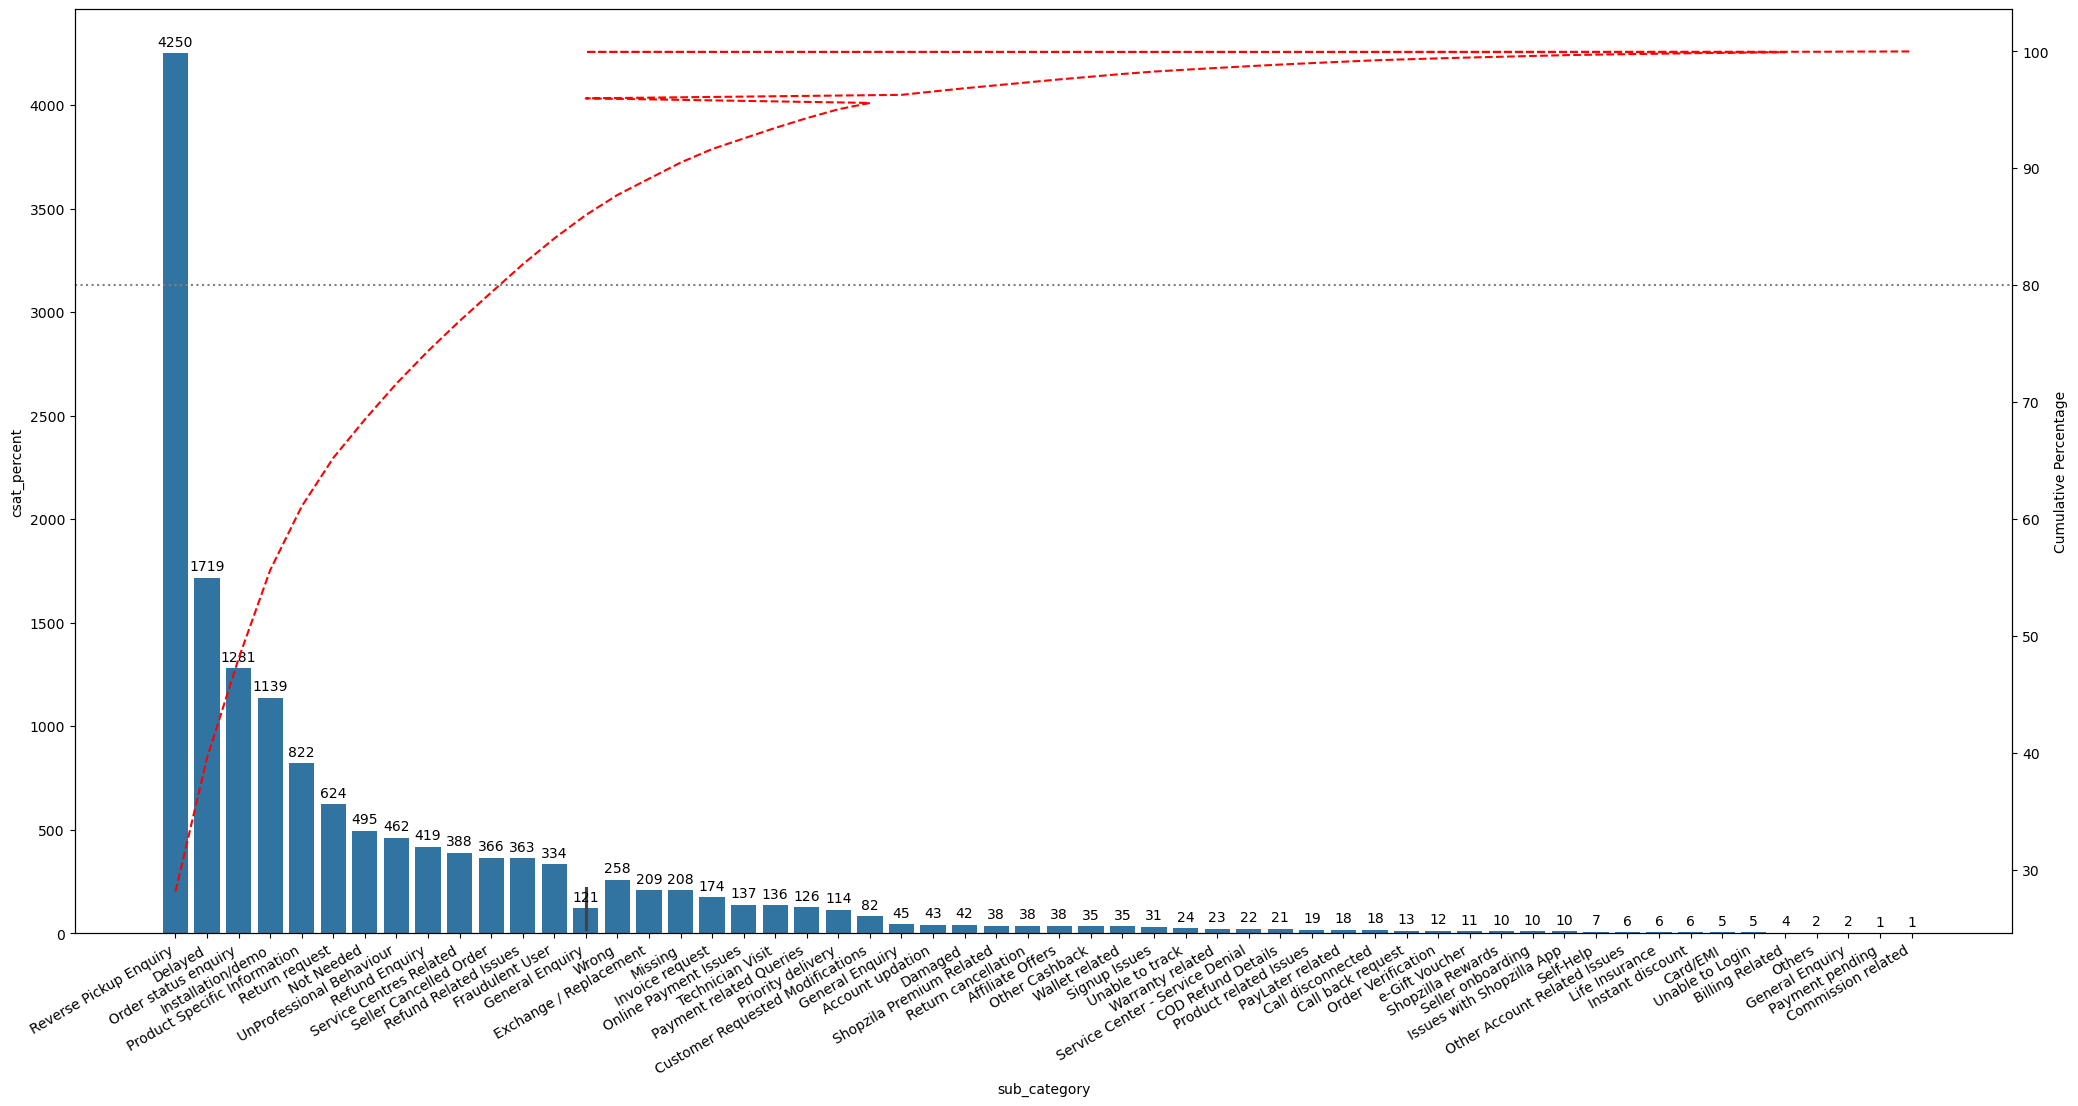

In [58]:
# plot pareto 
fig, ax1 = plt.subplots(figsize=(25, 12))
sns.barplot(data=dsat_group_by_sub_category, x='sub_category', y='csat_percent')
ax1.bar_label(ax1.containers[0], fmt='%d', padding=3)
ax1.set_xticklabels(dsat_group_by_sub_category['sub_category'], rotation=30, ha='right')

# secondary axis, plot frequency line
ax2 = ax1.twinx()
ax2.plot(dsat_group_by_sub_category['sub_category'], dsat_group_by_sub_category['cumulative'], color='red', linestyle='dashed', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')

# Add Threshold Line (80% Pareto Principle)
ax2.axhline(y=80, color='gray', linestyle='dotted')

plt.show()

- Reverse Pickup Enquiry, Delayed, and Order Status Enquiry are the leading sub-categories for DSATs

---

**What are the top impacting product categories?**

In [63]:
# group by product category and CSAT percent: 
dsat_group_by_product_category = dsat.groupby(['product_category'], as_index=False)['csat_percent'].count()

# sort the values in descending order.
dsat_group_by_product_category.sort_values(by='csat_percent', ascending=False, inplace=True)

# create the cumulative column
dsat_group_by_product_category['cumulative'] = dsat_group_by_product_category['csat_percent'].cumsum()/ dsat_group_by_product_category['csat_percent'].sum() * 100
dsat_group_by_product_category.reset_index(drop=True, inplace=True)

In [65]:
dsat_group_by_product_category

,product_category,csat_percent,cumulative
0,Electronics,1104,25.885111
1,LifeStyle,858,46.002345
2,Books & General merchandise,773,64.126612
3,Mobile,588,77.913247
4,Home Appliences,412,87.573271
5,Home,330,95.310668
6,Furniture,160,99.062134
7,Affiliates,29,99.742087
8,GiftCard,11,100.000000


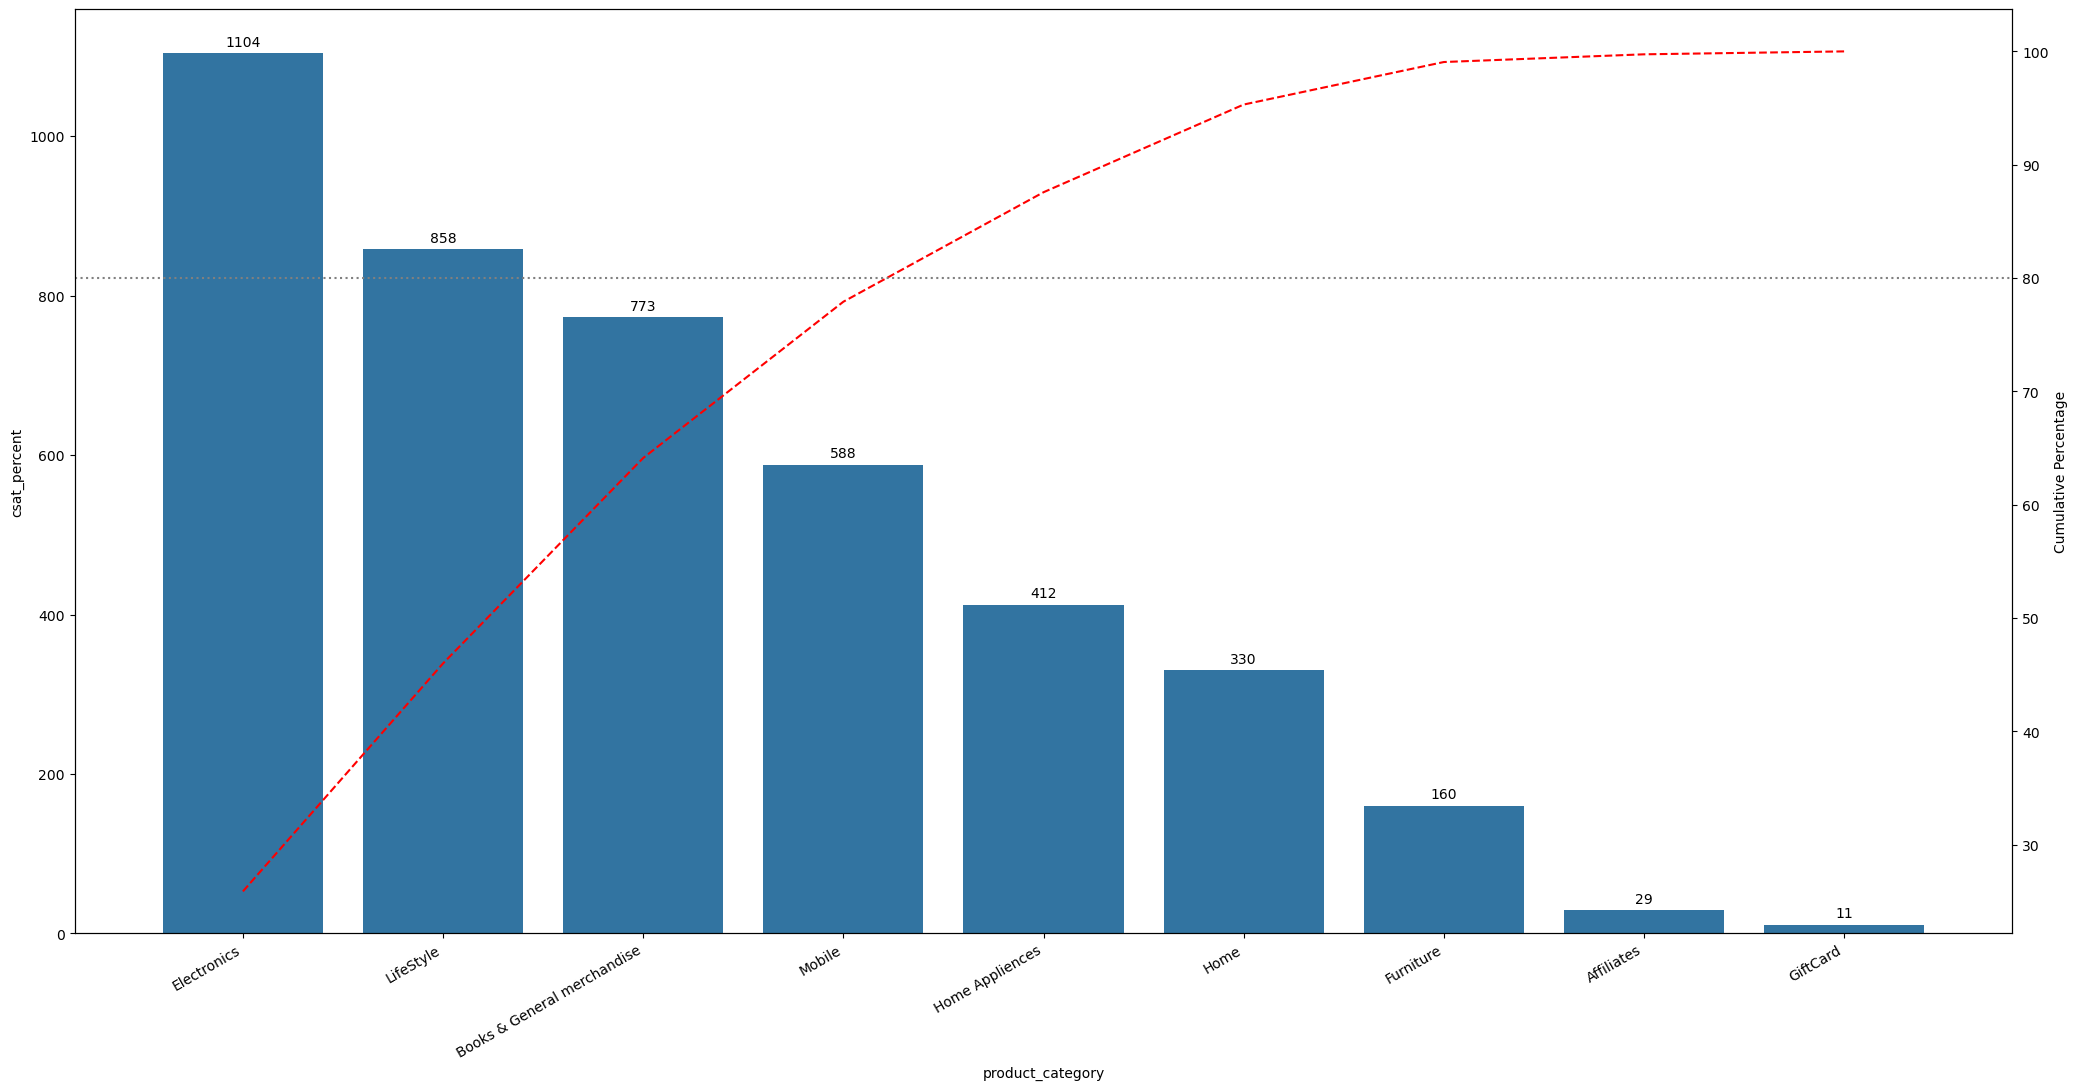

In [67]:
# plot pareto 
fig, ax1 = plt.subplots(figsize=(25, 12))
sns.barplot(data=dsat_group_by_product_category, x='product_category', y='csat_percent')
ax1.bar_label(ax1.containers[0], fmt='%d', padding=3)
ax1.set_xticklabels(dsat_group_by_product_category['product_category'], rotation=30, ha='right')

# secondary axis, plot frequency line
ax2 = ax1.twinx()
ax2.plot(dsat_group_by_product_category['product_category'], dsat_group_by_product_category['cumulative'], color='red', linestyle='dashed', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')

# Add Threshold Line (80% Pareto Principle)
ax2.axhline(y=80, color='gray', linestyle='dotted')

plt.show()

<br>

----

**What is the average response time by satisfaction level?**

In [72]:
# Verify that related date columns are logical
len(e_commerce_standard_df[e_commerce_standard_df['response_time'] < 0])

3128

There are entries where the response date and time occur before the reported date and time.<br />
In such cases, it's best to consult with stakeholders to determine how to handle incorrect or missing values. We have two options:

1 - Swap the dates for rows where the response time is earlier than the reported time. However, this may result in inaccuracies. For example, if "CAST, Very Satisfied" typically has an average response time of 2 hours, swapping dates could artificially inflate it to 12 hours.

2 - Exclude incorrect rows when aggregating impacted metrics. For instance, if grouping by satisfaction level to calculate average response time, we would drop the incorrect rows before aggregation to ensure accuracy.

<br>

For this project, we'll go with removing the incorrect data before aggregating columns. 

We won't have to remove the rows from all data frames as there are some instances where the rest of the row values are valid. (CSAT Score, tenure, category etc. )

In [77]:
# drop rows where the response time is negative (<0):
response_satisfaction = e_commerce_standard_df[e_commerce_standard_df['response_time'] > 0]

# group response time by satisfaction:
response_satisfaction_grouped = response_satisfaction.groupby('csat', as_index=False)['response_time'].mean()

# change time into hours.
response_satisfaction_grouped['response_time'] = response_satisfaction_grouped['response_time']/60

# round time to 2 decimals.
response_satisfaction_grouped['response_time']= response_satisfaction_grouped['response_time'].round(2)
response_satisfaction_grouped

# print the average response time broken out by satisfaction level the overall average response time.
#print(response_satisfaction_grouped)
print("\n", "AVG Response time: ", round(response_satisfaction_grouped['response_time'].mean()),2, " hours.")


 AVG Response time:  4 2  hours.


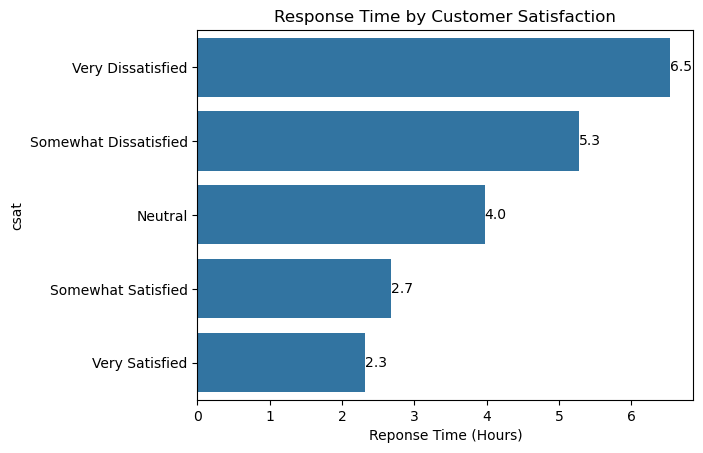

In [79]:
# sort by response time
response_satisfaction_grouped.sort_values(by='response_time', ascending=False, inplace=True)

# plot bar chart
ax = sns.barplot(data=response_satisfaction_grouped, x='response_time', y='csat')

ax.bar_label(ax.containers[0], fmt='%.1f')

plt.title('Response Time by Customer Satisfaction')
plt.xlabel('Reponse Time (Hours)')
plt.show()

- We can see that there's a correlation between satisfaction and response time. 

----

In [83]:
# We know that the email channel struggles most with CSAT from or prior charts, does response time play a role?
channel_dsat = response_satisfaction[response_satisfaction['csat_percent'] != 100].groupby(['channel_name',])['response_time'].mean().reset_index()

# convert the time to hours:
channel_dsat['response_time'] = channel_dsat['response_time']/60

channel_dsat

,channel_name,response_time
0,Email,7.166070
1,Inbound,5.964157
2,Outcall,5.719147


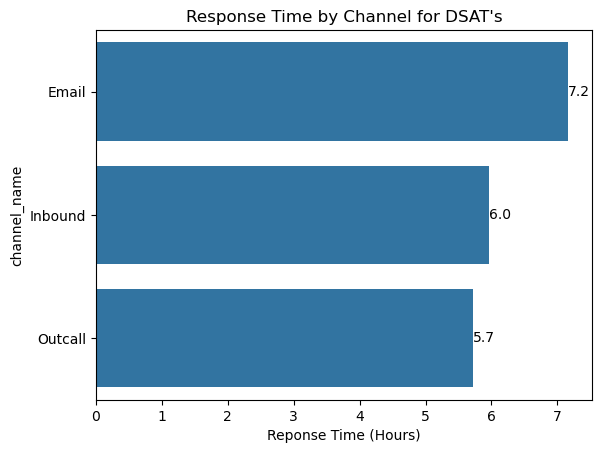

In [85]:
# plot bar chart
ax = sns.barplot(data=channel_dsat, x='response_time', y='channel_name')

ax.bar_label(ax.containers[0], fmt='%.1f')

plt.title("Response Time by Channel for DSAT's")
plt.xlabel('Reponse Time (Hours)')
plt.show()

**To what degree, does satisfaction correlate to response time?**

In [88]:
# group the df by csat score and channel name: 
csat_group_by_score = response_satisfaction.groupby(['channel_name','csat_score'])['response_time'].mean().reset_index()

# change the response time to hours: 
csat_group_by_score['response_time'] = csat_group_by_score['response_time']/60


In [90]:
csat_group_by_score

,channel_name,csat_score,response_time
0,Email,1,7.800392
1,Email,2,6.256557
2,Email,3,3.880952
3,Email,4,2.895442
4,Email,5,2.421627
5,Inbound,1,6.494855
6,Inbound,2,5.308006
7,Inbound,3,4.015368
8,Inbound,4,2.658036
9,Inbound,5,2.317482


<br>

In [93]:
# get the spearman correlation scores for each column relationships:
csat_group_by_score_corr = csat_group_by_score.corr(numeric_only=True, method='spearman')

csat_group_by_score_corr

,csat_score,response_time
csat_score,1.000000,-0.981981
response_time,-0.981981,1.000000


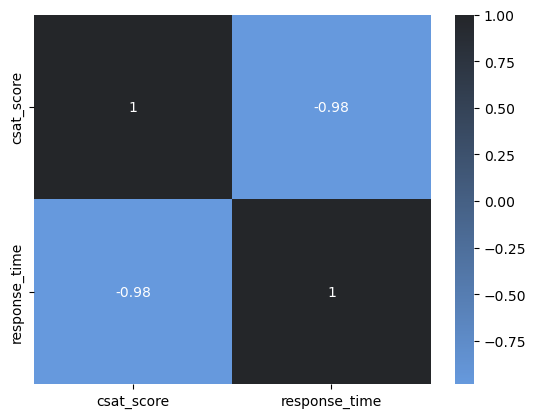

In [95]:
# Plot correlation with heatmap:
sns.heatmap(csat_group_by_score_corr, annot=True, cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True))

plt.show()

- CSAT score and Response Time have a very strong negative correlation, this means that they move in opposite directions.
- When one increases, the other decreases with very few exceptions.

- It is very important to understand that correlation score of -0.98 does not mean 98% likeliness. This only represent the strength of the relationship between the two.

----

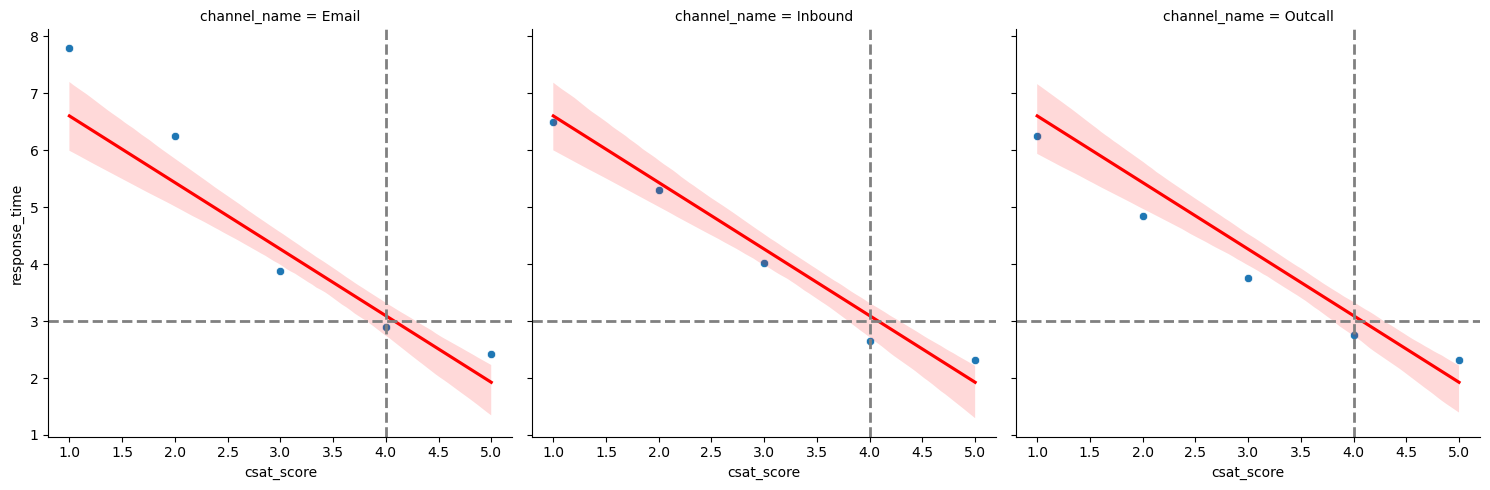

In [99]:
# assign rel plot to a variable:
g = sns.relplot(data=csat_group_by_score, x='csat_score', y='response_time', col='channel_name', kind='scatter')

# Loop through each facet and add regression line: 
for ax in g.axes.flat: 
    sns.regplot(csat_group_by_score, x='csat_score', y='response_time', scatter=False, color='red', ax=ax)
    ax.axhline(y=3, color="grey", linestyle="--", linewidth=2)
    ax.axvline(x=4, color="grey", linestyle="--", linewidth=2)
# display plots
plt.show()

- We can see for all channels, once the response time is above 3 hours the CSAT score is 3 and above (Neutral, Somewhat Dissatisfied and Very Dissatisfied) 
- The opposite is observed when the response time is under 3 hours. CSAT scores remain below 3 (Somewhat Satisfied and Very Satisfied).
- Email has the highest response time, so this correlates well with our initial finding that the email channel struggles the most on CSAT.

---

**Which Sub Categories Takes the most time to resolve that results in a Negative CSAT (DSAT)?**

In [104]:
# Checking how many records has handle time data:
handle_time_df = response_satisfaction[response_satisfaction['connected_handling_time'].notna()]
len(handle_time_df)

241

In [106]:
# group by sub category and average handle time
handle_time_grouped = handle_time_df[handle_time_df['csat_score'] < 3].groupby('sub_category', as_index=False).agg({'connected_handling_time': 'mean',
                                                                                                                   'unique_id': 'count'})

# sort the df by average handle time
handle_time_grouped.sort_values(by='connected_handling_time', ascending=False, inplace=True)

# Convert handle time to hours
handle_time_grouped['connected_handling_time'] =  handle_time_grouped['connected_handling_time']/60

handle_time_grouped

,sub_category,connected_handling_time,unique_id
3,Refund Enquiry,33.100000,1
1,Missing,9.016667,1
5,Return request,7.655556,3
6,Reverse Pickup Enquiry,6.990000,5
8,UnProfessional Behaviour,6.966667,1
4,Return cancellation,4.633333,6
2,Product Specific Information,3.433333,1
0,Installation/demo,2.083333,1
7,Shopzila Premium Related,0.000000,1


- There aren’t enough records with handle time data, to extract accurate insights, more data is needed.

---

<br> 


**How does Agent Tenure Impact Customer Satisfaction?**

In [112]:
# group df by tenure bucket and get the CSAT %
tenure_group = e_commerce_standard_df.groupby('tenure_bucket', as_index=False)['csat_percent'].mean()

tenure_group

,tenure_bucket,csat_percent
0,0-30,82.859162
1,31-60,83.746249
2,61-90,85.031894
3,>90,83.277886
4,On Job Training,80.021941


<br>

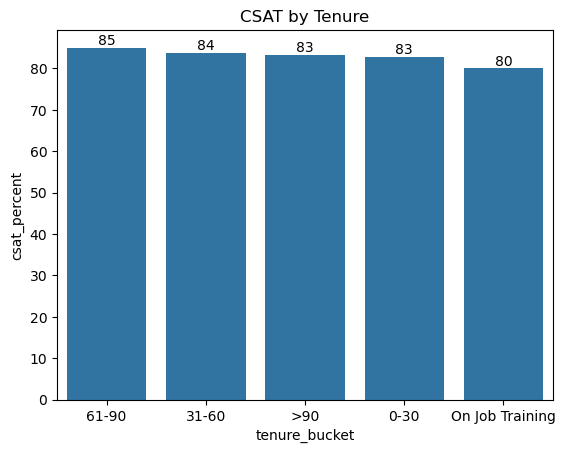

In [115]:
# sort data frame: 
tenure_group.sort_values(by='csat_percent', ascending=False, inplace=True)

# plot results
ax = sns.barplot(data=tenure_group, x='tenure_bucket', y='csat_percent')

# plot labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

# show title and chart: 
plt.title('CSAT by Tenure')
plt.show()

<br>

- Training agents' impact CSAT the most.
- the most Tenure agents are not the best performing. They performed the same as agents who just finished training.

----

**What are some of the top categories and sub-categories agents with training tenure is struggling with?**

In [121]:
# filter df where agent tenure is training.
training_tenure_df = e_commerce_standard_df[e_commerce_standard_df['tenure_bucket'] == 'On Job Training' ]

# group df by category and csat%.
training_tenure_group = training_tenure_df.groupby([ 'category'], as_index=False).agg({'csat_percent': 'mean', 'csat_score': 'count'})

# sort df by csat % descending.
training_tenure_group.sort_values(by=['csat_percent'], ascending=True, inplace=True)

# Rename column: 
training_tenure_group.rename(columns= {'csat_score': 'survey_count'}, inplace=True)

training_tenure_group.reset_index(drop=True)

,category,csat_percent,survey_count
0,Others,63.333333,30
1,Onboarding related,71.428571,14
2,Cancellation,75.438596,741
3,Product Queries,77.062229,1382
4,Order Related,77.252358,8480
5,Feedback,79.658385,644
6,Shopzilla Related,80.183276,873
7,Refund Related,80.449827,1156
8,Offers & Cashback,81.746032,126
9,Returns,82.528080,11218


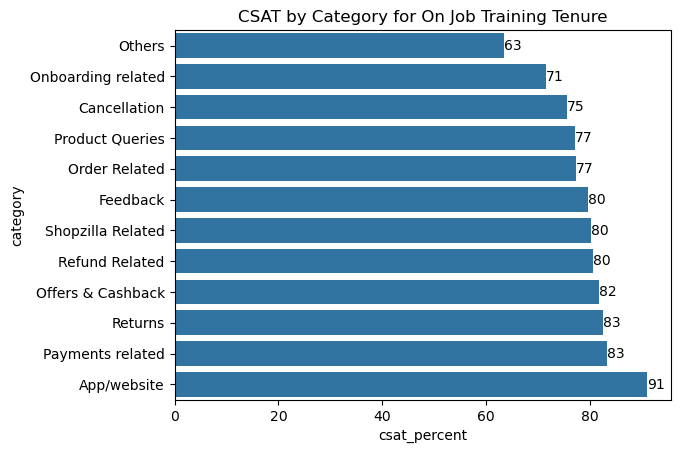

In [123]:
# Plot results: 

ax = sns.barplot(data=training_tenure_group, x='csat_percent', y='category')

#plot labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

# Show title and chart: 
plt.title('CSAT by Category for On Job Training Tenure')
plt.show()

- In addition to the categories where the whole centre is struggling with (Returns, Order Related and Product Queries), Training agents also struggling with [Others, Onboarding related, & Cancellation]

----

**Does an agent shift contribute to CSAT scores?**

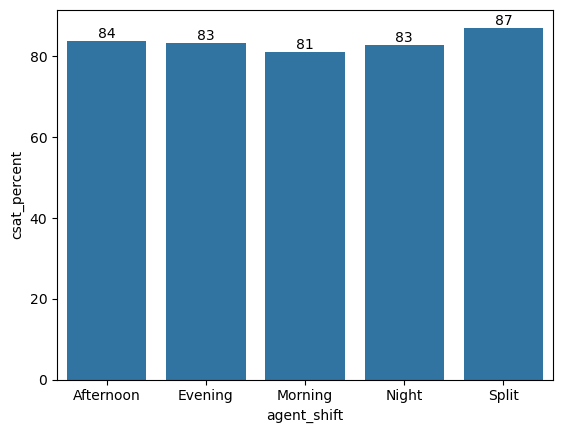

In [128]:
# group df by tenure bucket and get the CSAT %
shift_group = e_commerce_standard_df.groupby(['agent_shift'], as_index=False).agg({'csat_percent': 'mean', 'csat_score': 'count'})


# plot shift group: 

ax = sns.barplot(data=shift_group, x='agent_shift', y='csat_percent')

# plot labels: 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
    
plt.show()

-  split shift has a very high CSAT score, investigate more: 

<br>

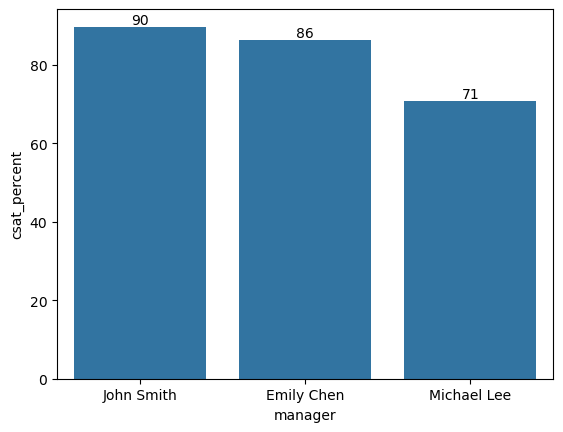

In [132]:
# filter the shift df by split shift
shift_group_split = e_commerce_standard_df[e_commerce_standard_df['agent_shift'] == 'Split']

# group the agent shift split df by manager: 
split_group = shift_group_split.groupby('manager', as_index=False)['csat_percent'].mean()

# sort df by CSAT% 
split_group.sort_values(by='csat_percent', ascending=False, inplace=True)
split_group.reset_index(inplace=True)

# plot bar chart: 

ax = sns.barplot(data=split_group, x='manager', y='csat_percent')

# plot labels: 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

- We can see that Managers John and Emma teams are performing very well on with split shift agents. However,  Michael Lee's team has opportunities to improve.
- Only 3 managers out of the total 6, have agents with split shifts.

----

**How do employees impact CSAT & Response Time?**

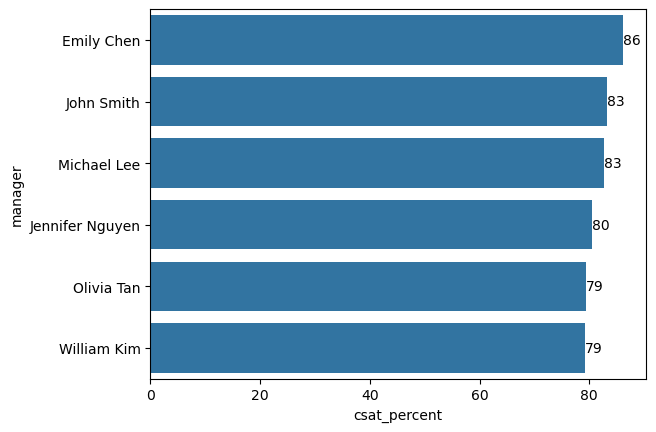

In [137]:
# Managers: 

manager_df = e_commerce_standard_df.groupby('manager', as_index=False)['csat_percent'].mean().sort_values(by='csat_percent', ascending=False)

# plot bar chart: 

ax = sns.barplot(data=manager_df, x='csat_percent', y='manager')

# plot labels: 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

- Top 3 managers are Emily, John and Michael, these managers are the only ones who have split shifts agents. 

In [140]:

training_tenure_group = training_tenure_df.groupby([ 'category'], as_index=False).agg({'csat_percent': 'mean', 'csat_score': 'count'})

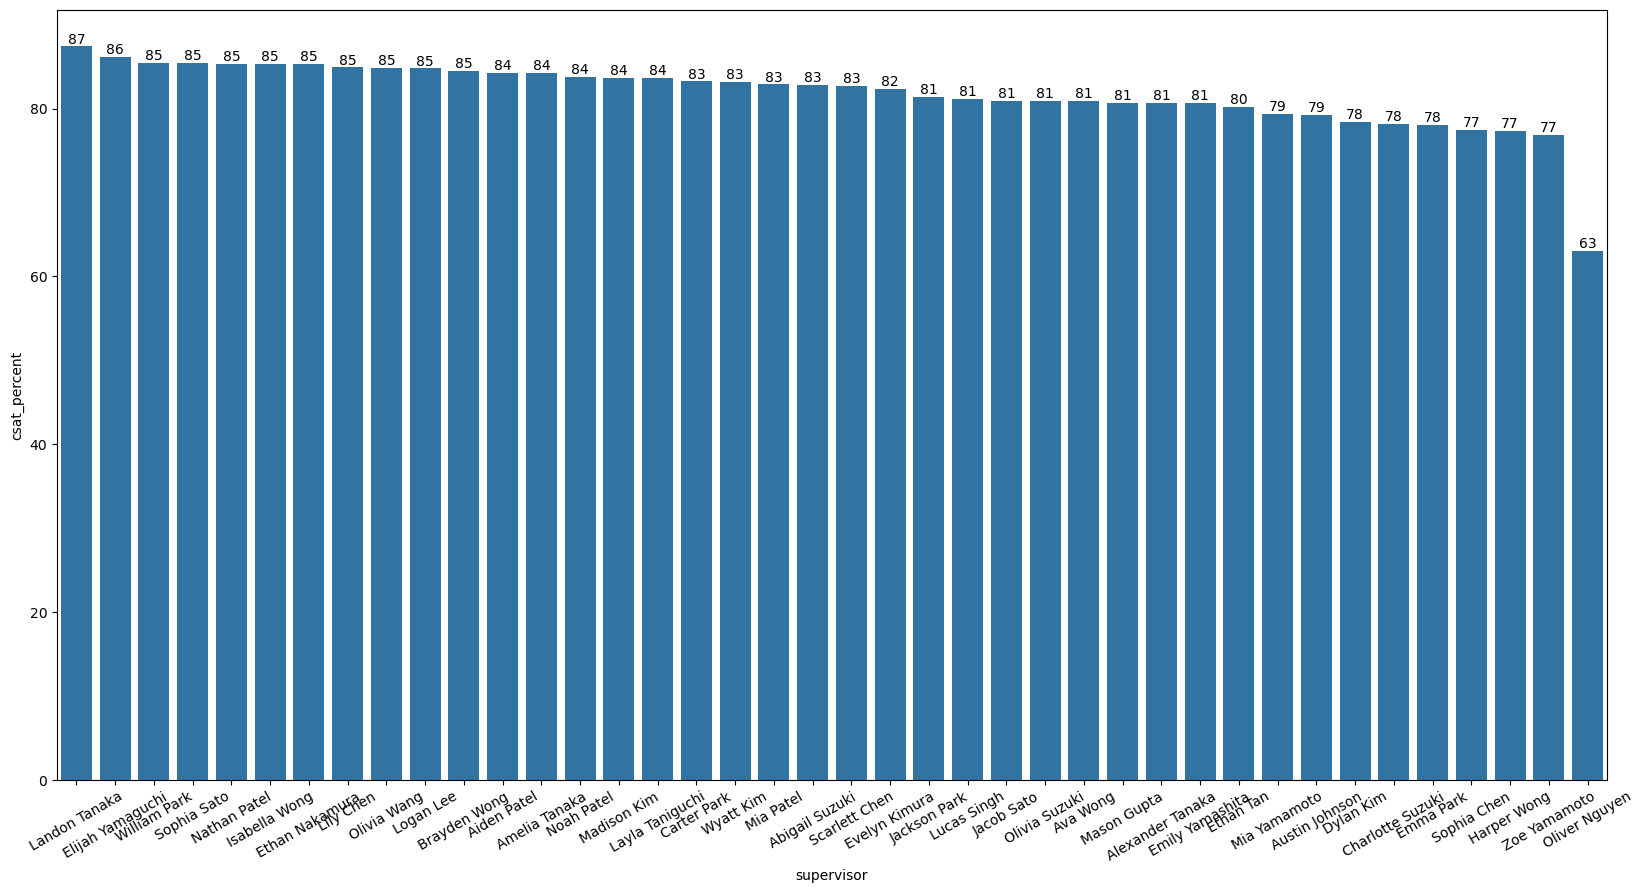

In [142]:
# Supervisors: 

# group df by supervisors with csat% and survey_count.
supervisor_df = e_commerce_standard_df.groupby(['supervisor' ], as_index=False).agg({'csat_percent': 'mean', 'csat_score': 'count'}).sort_values(
    by='csat_percent', ascending=False).reset_index(drop=True)

# rename csat_score column to survey_count
supervisor_df.rename(columns={'csat_score': 'survey_count'}, inplace=True)



# plot bar chart: 
plt.figure(figsize=(20,10))
ax = sns.barplot(data=supervisor_df, y='csat_percent', x='supervisor')

# rotate x labels
plt.xticks(rotation=30)

# plot labels: 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

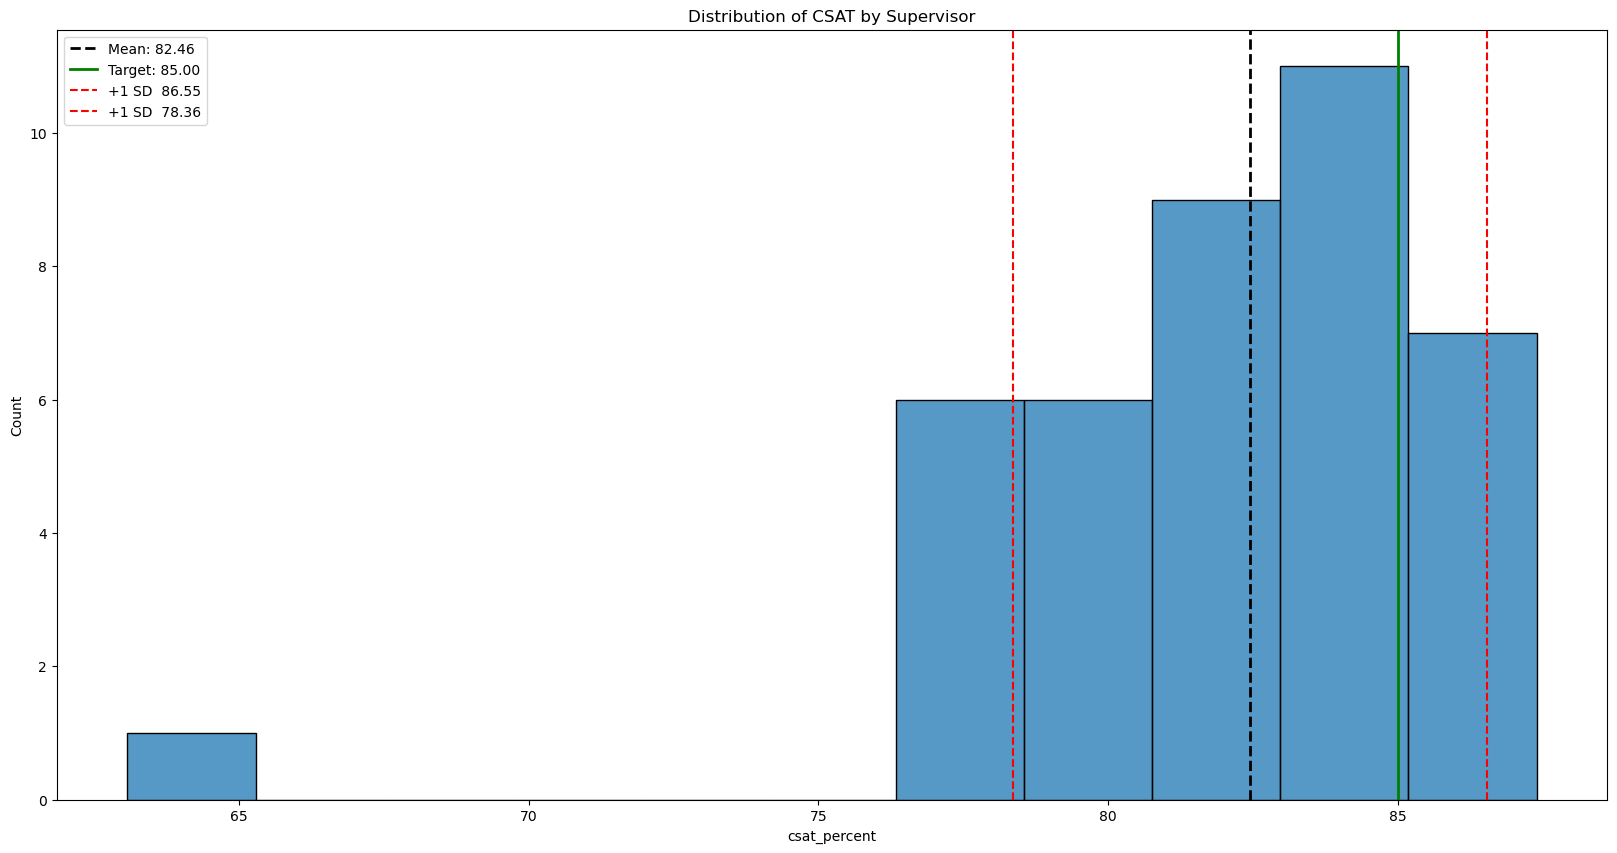

In [144]:
# Supervisors: 

# Get the CSAT mean
sup_mean_weighted = (supervisor_df['csat_percent'] * supervisor_df['survey_count']).sum() / supervisor_df['survey_count'].sum()
# Get the stdev for CSAT
std_dev = supervisor_df['csat_percent'].std()
# Assign the desired value for target.
target = 85

# plot figure
plt.figure(figsize=(20,10))

# plot histogram
sns.histplot(data=supervisor_df, x='csat_percent')
# add mean/average line
plt.axvline(sup_mean_weighted, color='black', linestyle='--', linewidth=2, label=f'Mean: {sup_mean_weighted:.2f}')
# Add target line
plt.axvline(target, color='green', linestyle='-', linewidth=2, label=f'Target: {target:.2f}')
# add +/- str_dev lines
plt.axvline(sup_mean_weighted + std_dev, color='red', linestyle='--', linewidth=1.5, label=f"+1 SD {(sup_mean_weighted + std_dev): .2f}")
plt.axvline(sup_mean_weighted - std_dev, color='red', linestyle='--', linewidth=1.5, label=f"+1 SD {(sup_mean_weighted - std_dev): .2f}")

# add title
plt.title('Distribution of CSAT by Supervisor')
# add legend
plt.legend()

plt.show()

In [146]:
# Top performaners: 

supervisor_df[supervisor_df['csat_percent'] >= sup_mean_weighted + std_dev]

,supervisor,csat_percent,survey_count
0,Landon Tanaka,87.400612,1635


In [148]:
# Low Performaners: 

supervisor_df[supervisor_df['csat_percent'] <= sup_mean_weighted - std_dev]

,supervisor,csat_percent,survey_count
34,Charlotte Suzuki,78.156997,1172
35,Emma Park,78.054711,3290
36,Sophia Chen,77.448071,337
37,Harper Wong,77.301162,1119
38,Zoe Yamamoto,76.823430,3551
39,Oliver Nguyen,63.069544,417


In [150]:
# Calculate the variance within the results for CSAT by supervisors
round((std_dev*6) / sup_mean_weighted, 2)

0.3

- The average performance is 2.64% away from the target (85%)
- There's an extreme outlier in the distribution and most supervisors are not on target.
- Top Supervisor is Landon Tanaka at 87%
- 6 supervisors below 79% with 1 below 65%
- Variance Significant Factor Score: 0.3 suggesting not a lot of variance amongst supervisors overall.

In [153]:
# group df by Agent and get the CSAT %
agent_group = e_commerce_standard_df.groupby('agent_name', as_index=False).agg({'csat_percent': 'mean', 
                                                                               'csat_score': 'count'
                                                                               }).sort_values(by='csat_percent', ascending=False).reset_index(drop=True)

agent_group.rename(columns={'csat_score': 'survey_count'}, inplace=True)
agent_group

,agent_name,csat_percent,survey_count
0,Patricia Cross,100.000000,24
1,Morgan Smith,100.000000,45
2,Sean Gay,100.000000,22
3,Nicole Simpson DVM,100.000000,20
4,Virginia Lane,100.000000,111
...,...,...,...
1366,Virginia Mccormick,28.571429,35
1367,Nicole Zavala,26.666667,30
1368,Curtis Mccarthy,26.666667,30
1369,Rebecca Miller,22.727273,22


<br>

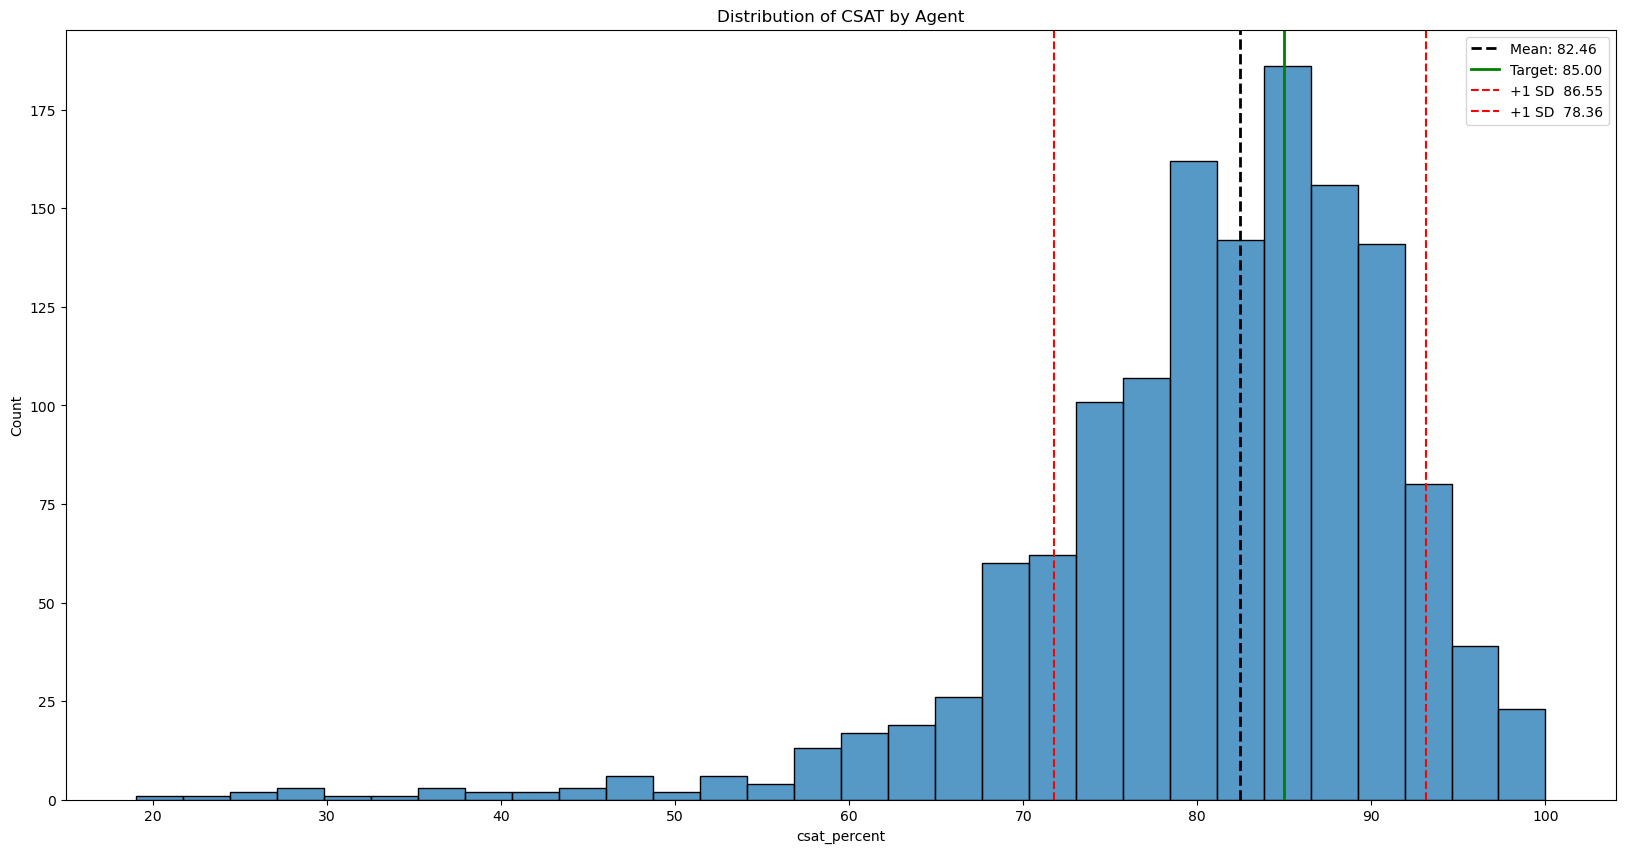

In [156]:
# Agents: 

# get the CSAT mean 
agent_mean_weighted = (agent_group['csat_percent'] * agent_group['survey_count']).sum() / agent_group['survey_count'].sum()
# Get the standard deviation for CSAT
std_dev_agent = agent_group['csat_percent'].std()
#Assign a value for target
target = 85

# Plot figure
plt.figure(figsize=(20,10))

# plot histogram
sns.histplot(data=agent_group, x='csat_percent', bins=30)
# add mean line
plt.axvline(agent_mean_weighted, color='black', linestyle='--', linewidth=2, label=f'Mean: {agent_mean_weighted:.2f}')
# add target line
plt.axvline(target, color='green', linestyle='-', linewidth=2, label=f'Target: {target:.2f}')
# add +/- std_dev lines (upper and lower spec limits)
plt.axvline(agent_mean_weighted + std_dev_agent, color='red', linestyle='--', linewidth=1.5, label=f"+1 SD {(agent_mean_weighted + std_dev): .2f}")
plt.axvline(agent_mean_weighted - std_dev_agent, color='red', linestyle='--', linewidth=1.5, label=f"+1 SD {(agent_mean_weighted - std_dev): .2f}")

# add title
plt.title('Distribution of CSAT by Agent')
# add legend
plt.legend()

plt.show()

In [158]:
# Top Performing agents: 
agent_group[agent_group['csat_percent'] >= agent_mean_weighted + std_dev_agent ].sort_values(by='csat_percent', ascending=False)

,agent_name,csat_percent,survey_count
0,Patricia Cross,100.000000,24
7,Brian Williams,100.000000,25
1,Morgan Smith,100.000000,45
11,Michael Allen,100.000000,21
10,Casey Baldwin,100.000000,24
...,...,...,...
99,Todd Bennett,93.333333,75
100,Brian Pugh,93.333333,30
101,Katrina Rodriguez,93.243243,74
102,John Buchanan,93.243243,74


In [160]:
# Low performing agents: 

agent_group[agent_group['csat_percent'] <= agent_mean_weighted - std_dev_agent ].sort_values(by='csat_percent', ascending=False)

,agent_name,csat_percent,survey_count
1169,Dylan Day,71.739130,46
1170,Joshua Ortiz,71.739130,46
1171,Devon Daniel,71.717172,99
1172,Craig Gonzales,71.590909,88
1178,Belinda Landry,71.428571,70
...,...,...,...
1366,Virginia Mccormick,28.571429,35
1367,Nicole Zavala,26.666667,30
1368,Curtis Mccarthy,26.666667,30
1369,Rebecca Miller,22.727273,22


In [162]:
# Calculate the variance within the results for CSAT by supervisors
round((std_dev_agent*6) / agent_mean_weighted, 2)

0.78

- The average performance is 2.64% away from the target (85%)
- 103 high performing agents above 86% 
- 202 agents below 72% with 1 below 20%
- Variance Significant Factor Score: 0.78 indicating that there's too much variance amongst supervisors' agents.

---

---

# Improve

## Conclusion: 

After analyzing **85,000+** records, the most impactful findings reveal key drivers of customer satisfaction gaps:

The **email channel** struggles the most, with lower CSAT than **inbound and outbound calls**. A key factor is **response time**. When it exceeds **three (3) hours**), satisfaction drops, while faster responses lead to more satisfied customers. Since email has the **highest response time**, this directly explains its lower performance.

**Returns**, **Order Issues**, and **Product Queries** account for **over 80%*** of dissatisfaction, with **Returns and Order Issues** alone responsible for more than 70%.

**Training agents** struggle more, especially with **Onboarding** and **Cancellations**, **but tenure does not guarantee better performance**. Experienced agents perform similarly to newly trained ones.

Among managers, **split shifts** appear effective, with John and Emily’s teams excelling, while Michael’s team has opportunities for improvement. Notably, the **top-performing managers** all utilize split shifts.

**Landon Tanaka’s** team leads at **87%**, surpassing the **83% average**. However, performance varies widely. **Over 100 agents** exceed **85% CSAT**, while **more than 200 agents fall below 72%**. A VSF (Variance Significance Factor) of 0.8 suggests notable differences in how teams and agents operate.

Finally, **handle time** data was **unavailable**, limiting deeper insights into agent performance. Addressing this data gap would provide a clearer picture of key performance drivers.

## Recommendations: 


- **Improve CSAT, especially for email, by reducing response times**  
  - Response time over three hours significantly lowers satisfaction; aim to keep it under three hours.
  - Identify which categories, sub-categories, or products take the longest to receive responses and find efficiency gaps.
  - Automate repetitive responses to allow agents to focus on more complex customer issues.
<br><br>

- **Address key dissatisfaction drivers: Returns, Order Issues, and Product Queries**  
  - These categories account for over 80% of dissatisfaction; improving them will have the highest impact. 
  - Analyze top-performing agents, supervisors, and managers to identify best practices. 
  - Standardize an effective and capable, data-backed process to reduce inconsistencies across teams. 
<br><br>

- **Enhance training programs with targeted coaching and mentorship**  
  - Tenure does not guarantee better performance, so continuous coaching is necessary.
  - Establish a learning curve to determine how long it takes for new agents to reach peak performance.
  - Track top affecting categories (Order Cancellation & Onboarding) for training to review and correct opportunities. Repeat over time when new opportunities arise.
  - Track tenured agents’ performance over time to proactively provide coaching when declines occur.
<br><br>

- **Expand split shift schedules**  
  - Limited data shows split shifts are highly effective, with top-performing managers utilizing them.
  - Encourage wider adoption where feasible to balance workloads and improve overall team performance.
<br><br>

- **Increase data collection efforts for deeper insights**  
  - Some insights were limited due to missing handle time data—longer data collection will reveal trends more accurately.
  - Collect agent quality data to better understand performance differences and identify key behavioral factors.
  - Use handle time data to pinpoint inefficiencies and refine training or workflow improvements.

<br>

----

<br>

# Control

The Dashboard below is built to monitor & track Manger, Supervisor and Agent Performance: 

In [177]:
# Export dataset to import into power bi
e_commerce_standard_df.to_excel('shopzilla.xlsx', index=False)

----